![](2022-11-20-00-53-55.png)

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col = 'DATE',
                 parse_dates = True
                )
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


# Exploratory Data Analysis and Visualization

In [3]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [4]:
df.tail()

,IPN31152N
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [7]:
df.columns = ['Production']

In [8]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


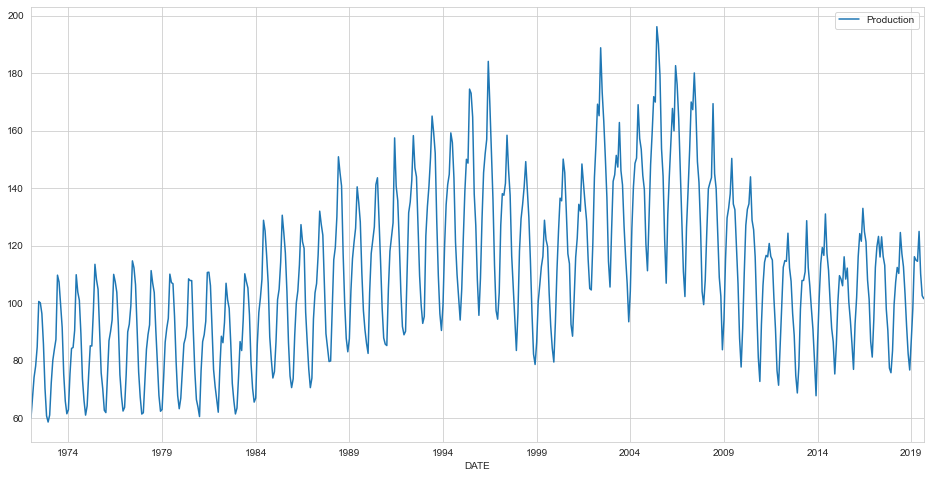

In [9]:
df.plot(figsize = (16,8));

# Preprocessing of Data

## Train Test Split

In [10]:
test_size = 24

In [11]:
test_ind = len(df) - test_size

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

## Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [18]:
X, y = generator[0]

In [19]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
n_features = train_scaled.shape[1]

![](2022-11-20-00-59-21.png)

## With Tanh activation func.

In [22]:
model = Sequential()

model.add(LSTM(64, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'tanh', return_sequences=True))
model.add(LSTM(16, activation = 'tanh'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 12, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [24]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [25]:
model.fit(generator,
        epochs = 20,
        validation_data = validation_generator,
        callbacks = [early_stop])

Epoch 1/20


C:\Users\EmincanY\AppData\Local\Temp\ipykernel_13496\436712031.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,


537/537 [==============================] - 11s 12ms/step - loss: 0.0277 - val_loss: 0.0056
Epoch 2/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0115 - val_loss: 0.0019
Epoch 3/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0064 - val_loss: 0.0019
Epoch 4/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0055 - val_loss: 0.0034
Epoch 5/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0051 - val_loss: 0.0024
Epoch 6/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 7/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 8/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 9/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 10/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0037 - val_loss: 0.0021
Epo

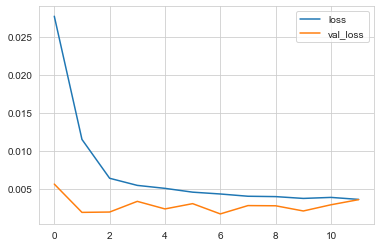

In [27]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [30]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 16ms/step


### Inverse Transformation and Comparing

In [31]:
predictions = scaler.inverse_transform(predictions_scaled)

In [32]:
compare = test[:12]
compare['Predictions_tanh'] = predictions
compare

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_13496\433311265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['Predictions_tanh'] = predictions


,Production,Predictions_tanh
DATE,,
2017-10-01,90.473,92.190
2017-11-01,77.438,89.863
2017-12-01,75.812,95.188
2018-01-01,83.434,103.831
2018-02-01,99.490,111.398
2018-03-01,107.315,116.645
2018-04-01,112.431,120.105
2018-05-01,110.354,121.060
2018-06-01,124.584,119.983


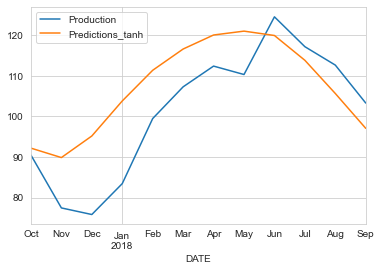

In [33]:
compare.plot();

In [34]:
eval_metrics(compare.Production, compare.Predictions_tanh)

r2_score: 0.4799628196894311 
mae: 9.56157115196511 
mse: 122.63552466788178 
rmse: 11.074092498615034


![](2022-11-20-01-03-25.png)

## with "relu" activation function

In [35]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_4 (LSTM)               (None, 12, 32)            12416     
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [37]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [38]:
model.fit(generator,
        epochs = 20,
        validation_data = validation_generator,
        callbacks = [early_stop])

Epoch 1/20


C:\Users\EmincanY\AppData\Local\Temp\ipykernel_13496\436712031.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,


537/537 [==============================] - 9s 11ms/step - loss: 0.0355 - val_loss: 0.0089
Epoch 2/20
537/537 [==============================] - 6s 10ms/step - loss: 0.0195 - val_loss: 0.0073
Epoch 3/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0128 - val_loss: 0.0015
Epoch 4/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0081 - val_loss: 0.0124
Epoch 5/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0079 - val_loss: 0.0157
Epoch 6/20
537/537 [==============================] - 5s 9ms/step - loss: 0.0075 - val_loss: 0.0018
Epoch 7/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0064 - val_loss: 0.0018
Epoch 8/20
537/537 [==============================] - 5s 10ms/step - loss: 0.0075 - val_loss: 0.0029


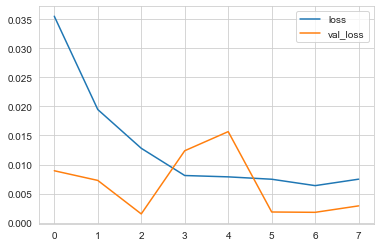

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [40]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 22ms/step


### Inverse Transformation and Comparing

In [41]:
predictions = scaler.inverse_transform(predictions_scaled)

In [42]:
compare['Predictions_relu'] = predictions
compare

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_13496\2929100526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['Predictions_relu'] = predictions


,Production,Predictions_tanh,Predictions_relu
DATE,,,
2017-10-01,90.473,92.190,92.406
2017-11-01,77.438,89.863,84.632
2017-12-01,75.812,95.188,91.667
2018-01-01,83.434,103.831,103.369
2018-02-01,99.490,111.398,113.615
2018-03-01,107.315,116.645,117.811
2018-04-01,112.431,120.105,117.307
2018-05-01,110.354,121.060,117.897
2018-06-01,124.584,119.983,118.425


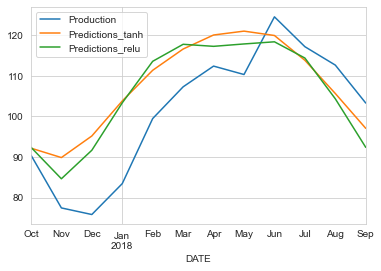

In [43]:
compare.plot();

In [44]:
eval_metrics(compare.Production, compare.Predictions_relu)

r2_score: 0.5303762707239632 
mae: 9.179753073079139 
mse: 110.74699005532541 
rmse: 10.523639582165735


# Retrain and Forecasting

In [45]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [46]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [47]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit(generator, epochs=10)

Epoch 1/10


C:\Users\EmincanY\AppData\Local\Temp\ipykernel_13496\3071223670.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10)


561/561 [==============================] - 9s 10ms/step - loss: 0.0357
Epoch 2/10
561/561 [==============================] - 6s 11ms/step - loss: 0.0171
Epoch 3/10
561/561 [==============================] - 7s 12ms/step - loss: 0.0093
Epoch 4/10
561/561 [==============================] - 6s 11ms/step - loss: 0.0072
Epoch 5/10
561/561 [==============================] - 6s 10ms/step - loss: 0.0074
Epoch 6/10
561/561 [==============================] - 6s 10ms/step - loss: 0.0076
Epoch 7/10
561/561 [==============================] - 6s 10ms/step - loss: 0.0067
Epoch 8/10
561/561 [==============================] - 6s 11ms/step - loss: 0.0068
Epoch 9/10
561/561 [==============================] - 6s 11ms/step - loss: 0.0064
Epoch 10/10
561/561 [==============================] - 5s 9ms/step - loss: 0.0065


In [48]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 23ms/step


In [49]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[102.56133217],
       [ 89.31850304],
       [ 85.3543944 ],
       [ 95.62876025],
       [110.59327575],
       [126.60384078],
       [125.77168216],
       [129.01352016],
       [134.50630886],
       [121.59560263],
       [114.4955236 ],
       [113.7598333 ]])

In [50]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [51]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [52]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,102.561
2019-11-01,89.319
2019-12-01,85.354
2020-01-01,95.629
2020-02-01,110.593
2020-03-01,126.604
2020-04-01,125.772
2020-05-01,129.014
2020-06-01,134.506
2020-07-01,121.596


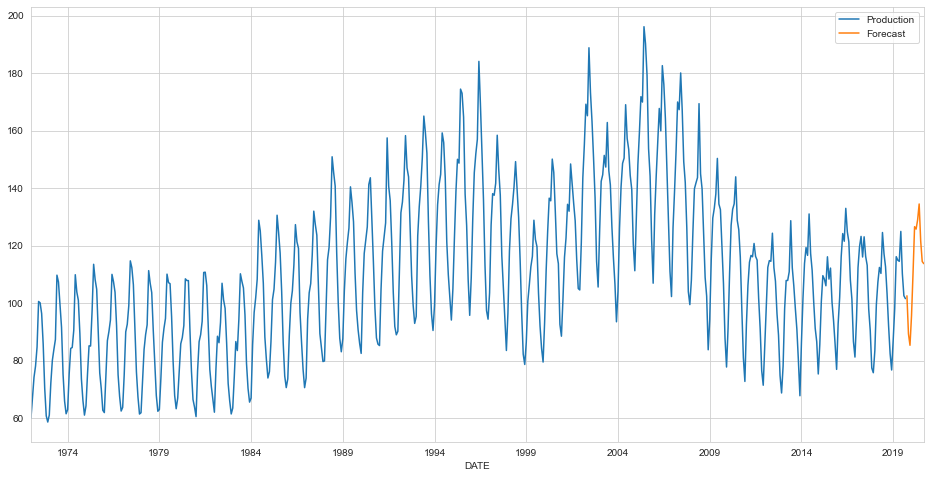

In [53]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 620.0)

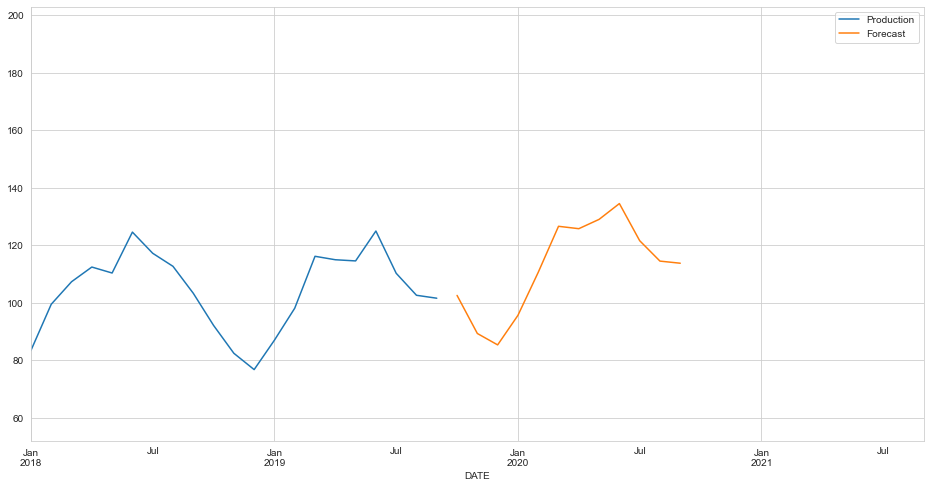

In [54]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')

In [ ]:
# Done !